# Visualizing intramolecular HAT network using graphviz

Import csv reader and graph creation/visualization packages

In [1]:
import csv
import pygraphviz as pgv
from IPython.display import Image

Function that extracts data from csv file for edge weighting

In [2]:
def read_csv(file_path):

    # Create empty list to fill with tuples from csv file
    tuples_list = []
    
    # Open the file
    with open(file_path, mode='r') as file:
        # Create a CSV reader
        csv_reader = csv.reader(file)
        
        # Skip the header if there is one
        next(csv_reader)
        
        # Iterate over the CSV rows
        for row in csv_reader:
            # print(row)  # Each row is a list of values
            tuples_list.append((str(row[0]), str(row[1]), float(row[2])))

    return tuples_list

Function that takes the number of amines and assigns each a letter

In [3]:
def convert_number_to_letter(number):
    # Check if the number is in the range 1-26
    if 1 <= number <= 26:
        return chr(number + 64)
    else:
        return "Number out of range"

Function that creates a new graph with an image of each amine as the nodes

In [4]:
def create_graph_with_nodes(num_amines, amine_png_path):
    G = pgv.AGraph(strict=True, directed=True)
    G.node_attr['color'] = '#f0f0f0'
    G.node_attr['style'] = 'filled'
    for i in range(1,num_amines+1):
        G.add_node(str(convert_number_to_letter(i)), shape='none', label='', image=amine_png_path+'amine_'+str(i)+'.png', width=0.5, imagescale='true')
    return G

Function to invert edge weight to penwidth, with adjustments

In [5]:
def weight_to_penwidth(weight, max_weight, scale_factor=0.1, base_width=0.1):
    return max((max_weight - weight) * scale_factor + base_width, 1)

Function to invert edge weight to fontsize, with adjustments

In [6]:
def weight_to_fontsize(weight, max_weight, scale_factor=0.2, base_width=16):
    return max((max_weight - weight) * scale_factor + base_width, 5)

Function to invert weight to grayscale, with adjustments

In [7]:
def weight_to_color(weight, max_weight, weight_range):
    normalized_weight = (max_weight - weight) / weight_range
    return min((100 - int(normalized_weight * 100), 90))

Function to add weighted edges to the graph according to the height of the activation barrier between each amine structure

In [8]:
def add_edges_to_graph(G, edge_data):
    G.edge_attr['color'] = 'black'
    G.edge_attr['fontsize'] = '10'
    G.edge_attr['fontname'] = 'arial'

    # extract min, max and range of edge weights
    max_weight = max(weight for _, _, weight in edge_data)
    min_weight = min(weight for _, _, weight in edge_data)
    weight_range = max_weight - min_weight

    # create edge where line thickness, fontsize and line color are inversely proportional to the barrier height
    for u, v, weight in edge_data:
        penwidth = weight_to_penwidth(weight, max_weight)
        dynamic_fontsize = weight_to_fontsize(weight, max_weight)
        edge_color = weight_to_color(weight, max_weight, weight_range)
        G.add_edge(u, v, weight=weight, label=str(weight), penwidth=penwidth, fontsize=dynamic_fontsize, color=f'gray{edge_color}', arrowhead='vee')

    return G

Function to save the output graph as both a png and pdf file

In [9]:
def save_graph(G, output_path):
    G.draw(output_path+'intramolecular_HAT.pdf', prog='dot', format='pdf')
    G.draw(output_path+'intramolecular_HAT.png', prog='dot', format='png')

For each amine:
1. Read in csv file (skip header) where column 0 is amine i, column 2 is atom j, and column 3 is the activation barrier (kcal/mol) that transforms amine i to amine j
2. Add nodes to graph according to number of atoms in amine (i.e. unique letters in csv file)
3. Create edge list using amine pairs and activation barriers
4. Define edge weights according to activation barriers
5. Add edges to graph
6. Visualize and save graph

### Amine e-2

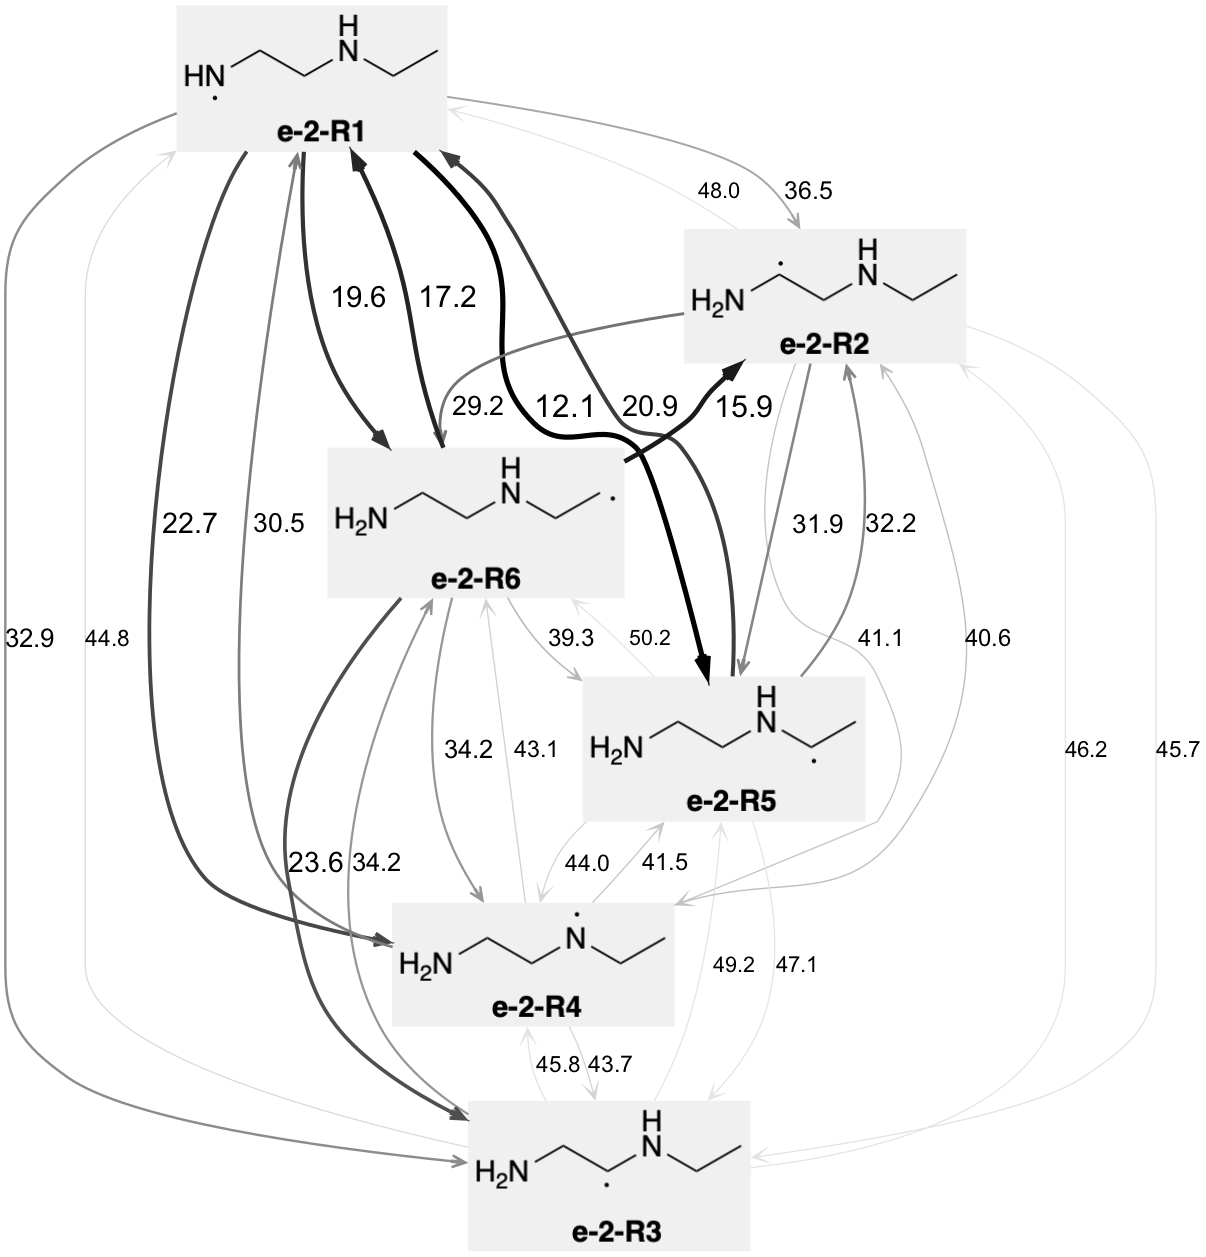

In [10]:
e2_path = "/Users/alistairsterling/calculations/mofs/intramolecular_hat/"
e2_data = read_csv(file_path=e2_path+"csv_files/e-2.csv")
e2_amine_png_path = e2_path+"e2_amine_pngs/"
num_e2_amines = 6
e2_graph = create_graph_with_nodes(num_e2_amines, e2_amine_png_path)
e2_graph = add_edges_to_graph(e2_graph, e2_data)
e2_output_path = e2_path+"e2_output/"
save_graph(e2_graph, e2_output_path)
Image(e2_output_path+'/intramolecular_HAT.png')

### Amine en

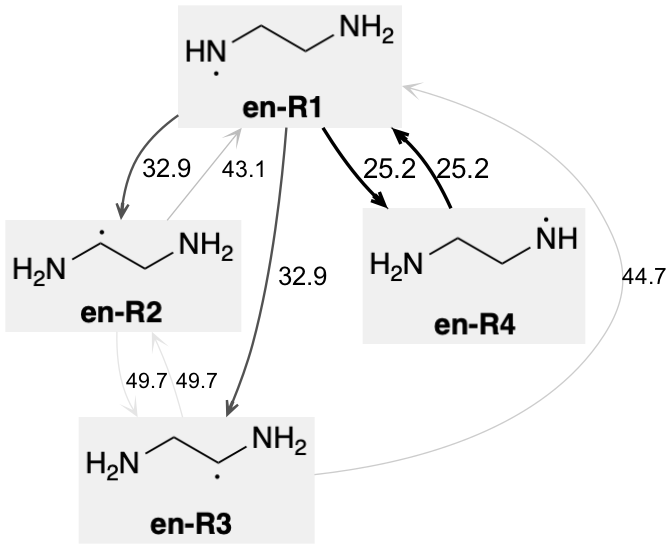

In [11]:
en_path = "/Users/alistairsterling/calculations/mofs/intramolecular_hat/"
en_data = read_csv(file_path=en_path+"csv_files/en.csv")
en_amine_png_path = en_path+"en_amine_pngs/"
num_en_amines = 4
en_graph = create_graph_with_nodes(num_en_amines, en_amine_png_path)
en_graph = add_edges_to_graph(en_graph, en_data)
en_output_path = en_path+"en_output/"
save_graph(en_graph, en_output_path)
Image(en_output_path+'/intramolecular_HAT.png')

### Amine mm-2

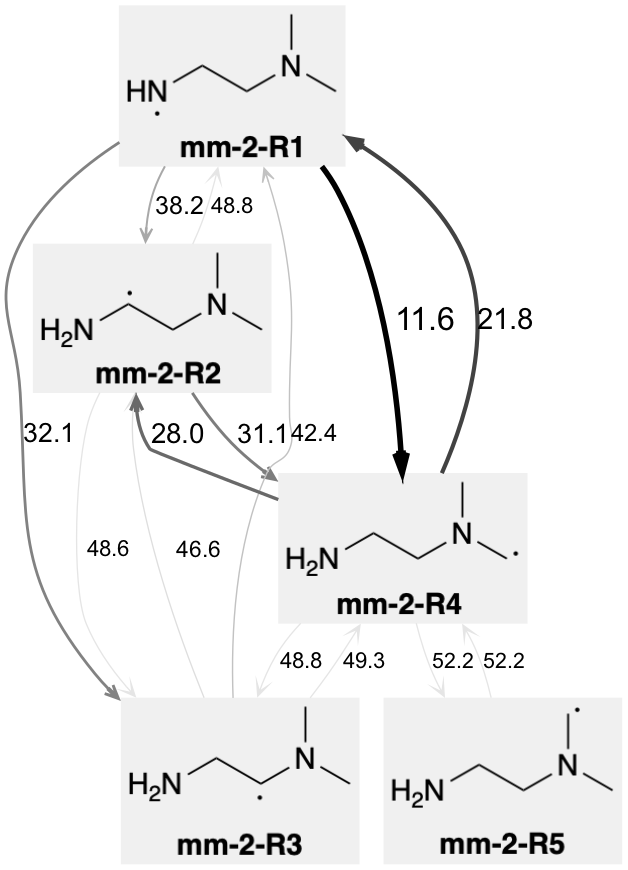

In [12]:
mm2_path = "/Users/alistairsterling/calculations/mofs/intramolecular_hat/"
mm2_data = read_csv(file_path=en_path+"csv_files/mm-2.csv")
mm2_amine_png_path = mm2_path+"mm2_amine_pngs/"
num_mm2_amines = 5
mm2_graph = create_graph_with_nodes(num_mm2_amines, mm2_amine_png_path)
mm2_graph = add_edges_to_graph(mm2_graph, mm2_data)
mm2_output_path = mm2_path+"mm2_output/"
save_graph(mm2_graph, mm2_output_path)
Image(mm2_output_path+'/intramolecular_HAT.png')

### Amine tmen

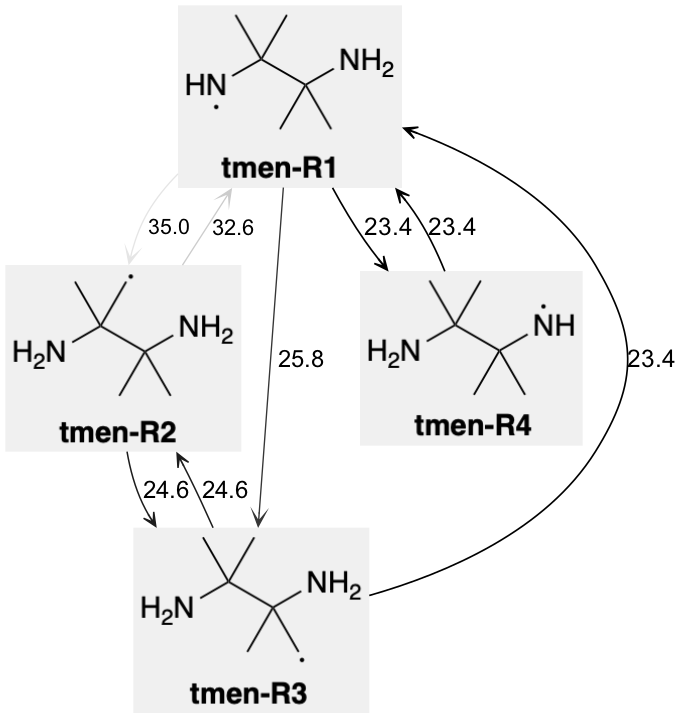

In [15]:
tmen_path = "/Users/alistairsterling/calculations/mofs/intramolecular_hat/"
tmen_data = read_csv(file_path=en_path+"csv_files/tmen.csv")
tmen_amine_png_path = tmen_path+"tmen_amine_pngs/"
num_tmen_amines = 4
tmen_graph = create_graph_with_nodes(num_tmen_amines, tmen_amine_png_path)
tmen_graph = add_edges_to_graph(tmen_graph, tmen_data)
tmen_output_path = tmen_path+"tmen_output/"
save_graph(tmen_graph, tmen_output_path)
Image(tmen_output_path+'/intramolecular_HAT.png')